In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part_1

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
df = pd.read_csv('/content/drive/MyDrive/Dimon/Again/5_хорошее_разделение/stratified_valid.csv')

In [ ]:
df.head()

,car_id,target_reg,num_fold
0,y13744087j,9492.96,NaN
1,O41613818T,2656.23,NaN
2,d-2109686j,1526.11,NaN
3,u29695600e,1338.00,NaN
4,N-8915870N,825.72,NaN


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Число групп, на которые поделим диапазон значений таргета
N = 10

# StratifiedKFold умеет работать только с дискретными/целыми значениями.
# Поэтому делим таргет на N групп
df['target_reg_group'] = pd.qcut(df['target_reg'], N, labels = [f'group_{i}' for i in range(N)])
# StratifiedKFold умеет работать только с дискретными/целыми значениями.
# Поэтому делим таргет на N групп
df['target_reg_group'] = pd.qcut(df['target_reg'], N, labels = [f'group_{i}' for i in range(N)])

# Теперь можно применить StratifiedKFold
skf = StratifiedKFold(n_splits=N, shuffle = True)
y = df['target_reg_group']
df['num_fold'] = None

# Your Code Here
all_shit = dict()
for i, (train_index, test_index) in enumerate(skf.split(df, df['target_reg_group'])):
  for r in test_index:
    all_shit[r] = str(i)
for k, v in all_shit.items():
  df.loc[k,'num_fold'] = v
df.drop('target_reg_group', axis= 1 , inplace= True )

In [ ]:
# df.drop('target_reg_group', axis= 1 , inplace= True )
df.to_csv('sample_submission_1', index=False)

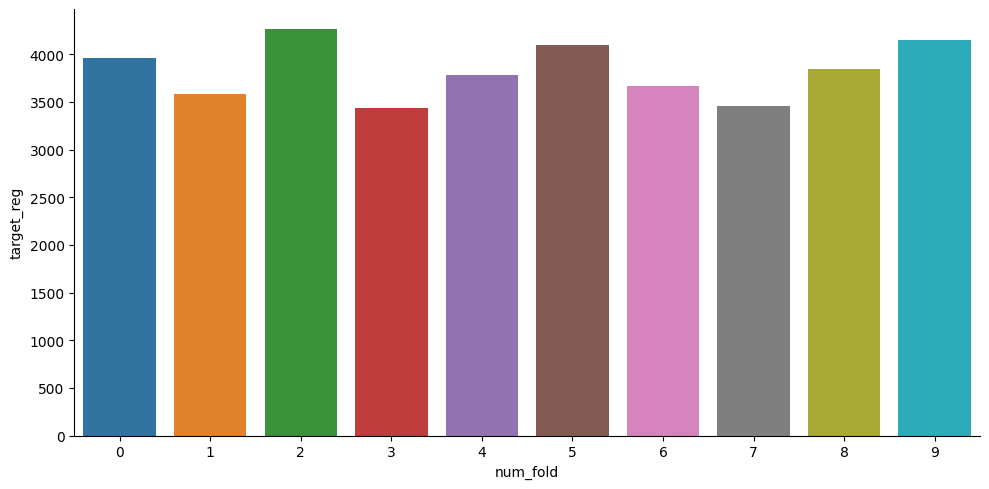

In [ ]:
import seaborn as sns

tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

# Part_2

In [69]:
df = pd.read_csv('/content/drive/MyDrive/Dimon/Again/5_хорошее_разделение/multi_label.csv')
df.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,9431,1,0,1,1,0,0,0,0,0,0,0,0
1,7960,1,1,0,1,0,0,0,0,0,0,0,1
2,8578,1,1,0,1,0,0,0,0,0,1,0,0
3,1651,1,0,1,1,0,0,0,0,0,0,0,0
4,4011,1,0,1,1,0,0,0,0,0,0,0,0


In [70]:
!pip install iterative-stratification

In [78]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import numpy as np

df['kfold'] = None

mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=0)
all_shit = dict()
for i, (train_index, test_index) in enumerate(mskf.split(df, df)):
   for r in test_index:
    all_shit[r] = str(i)
for k, v in all_shit.items():
  df.loc[k,'kfold'] = v

In [79]:
targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
           'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
           'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']
tmp = df.groupby(['kfold'], as_index=False).sum()
tmp_melt = tmp.melt(id_vars = 'kfold', value_vars = targets, value_name = 'count', var_name = 'class')
print(tmp_melt.groupby(['class'], as_index=False).std()['count'].mean())

0.3400211311688078


In [81]:
df.to_csv('123.csv', index=False)

In [72]:
df.kfold.unique()

array(['3', '4', '0', '1', '2'], dtype=object)